In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib notebook
%run ../quaternion.py

In [21]:
def plot_vector(axes, *, position, direction, length=1., linewidth=1.0, linestyle='solid', color='r', alpha=1.):
    axes.quiver(position[0], position[1], position[2], direction[0], direction[1], direction[2], length=length, linewidth=linewidth, linestyle=linestyle, color=color, alpha=alpha)

def plot_basis(axes, *, length=1., linewidth=1.):
    org = np.zeros(3)
    plot_vector(axes, position=org, direction=np.array([1., 0., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 1., 0.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')
    plot_vector(axes, position=org, direction=np.array([0., 0., 1.]), length=length, linewidth=linewidth, linestyle='dashed', color='k')

def plot_sphere(axes, *, radius=1., color='r', alpha=1.):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    axes.plot_surface(x, y, z,  rstride=4, cstride=4, color=color, alpha=alpha)
    
def exec_plotter(func):
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1, projection='3d')
    func(axes)
    axes.set_aspect('equal', adjustable='box')
    axes.set_xlabel('x')
    axes.set_ylabel('z')
    axes.set_zlabel('y')
    axes.invert_yaxis()
    plt.show()

Rotate a Vector with a Quaternion.

<IPython.core.display.Javascript object>


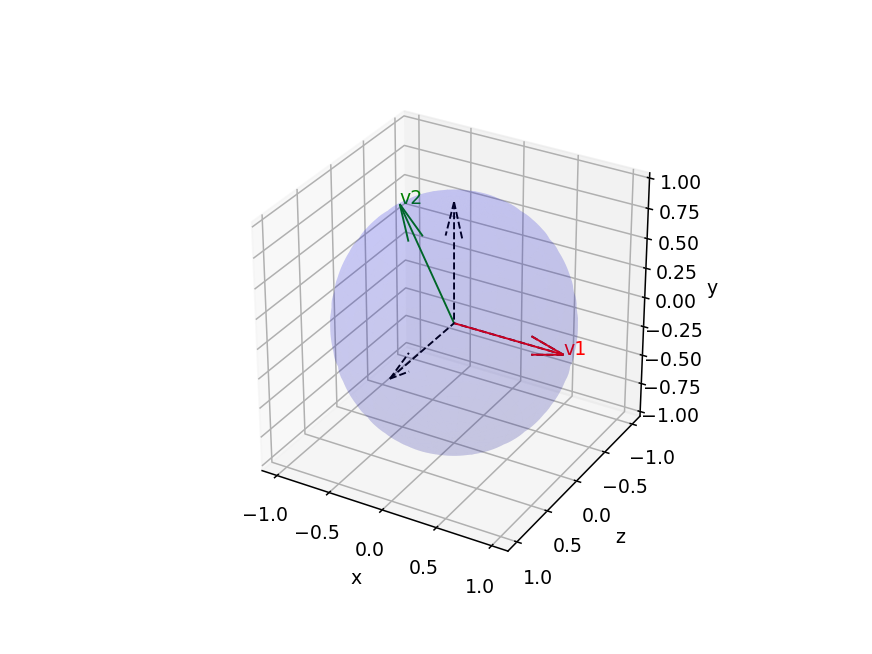

In [22]:
def plot1(axes):
    q = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(120.))
    v1 = np.array([1., 0., 0.])
    v2 = Quaternion.rotate(q, v1)
    #
    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    plot_vector(axes, position=np.zeros(3), direction=np.take(v1, (0, 2, 1)), color='r')
    axes.text(v1[0], v1[2], v1[1], 'v1', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(v2, (0, 2, 1)), color='g')
    axes.text(v2[0], v2[2], v2[1], 'v2', color='g')

exec_plotter(plot1)

Rotate a Vector with a multiple Quaternions.

<IPython.core.display.Javascript object>


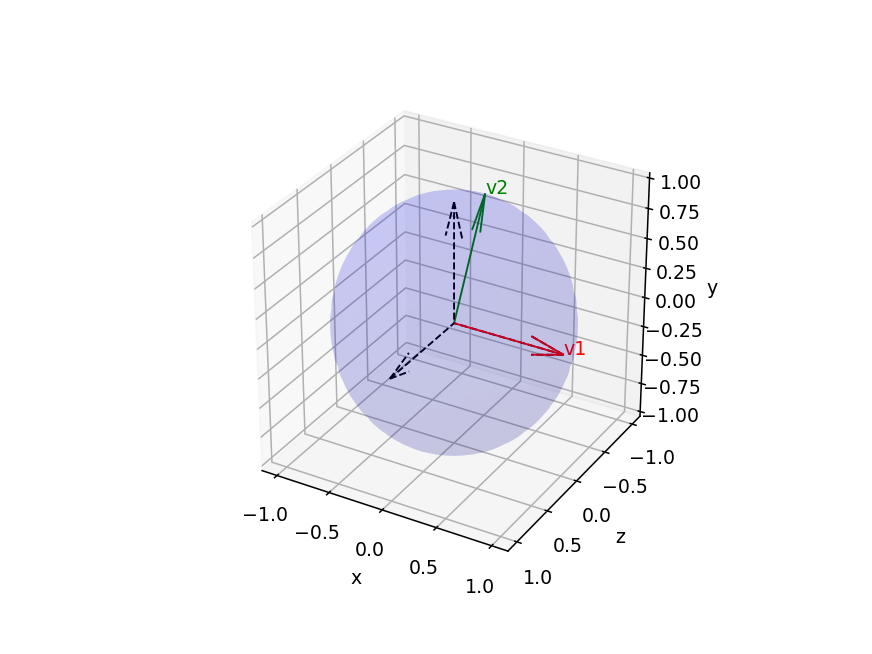

In [23]:
def plot2(axes):
    q1 = Quaternion.from_axis_angle(np.array([0., 1., 0.]), math.radians(30.))
    q2 = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(90.))
    q = q2 * q1
    v1 = np.array([1., 0., 0.])
    v2 = Quaternion.rotate(q, v1)
    #
    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    plot_vector(axes, position=np.zeros(3), direction=np.take(v1, (0, 2, 1)), color='r')
    axes.text(v1[0], v1[2], v1[1], 'v1', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(v2, (0, 2, 1)), color='g')
    axes.text(v2[0], v2[2], v2[1], 'v2', color='g')

exec_plotter(plot2)

Draw a slerp paths.

<IPython.core.display.Javascript object>


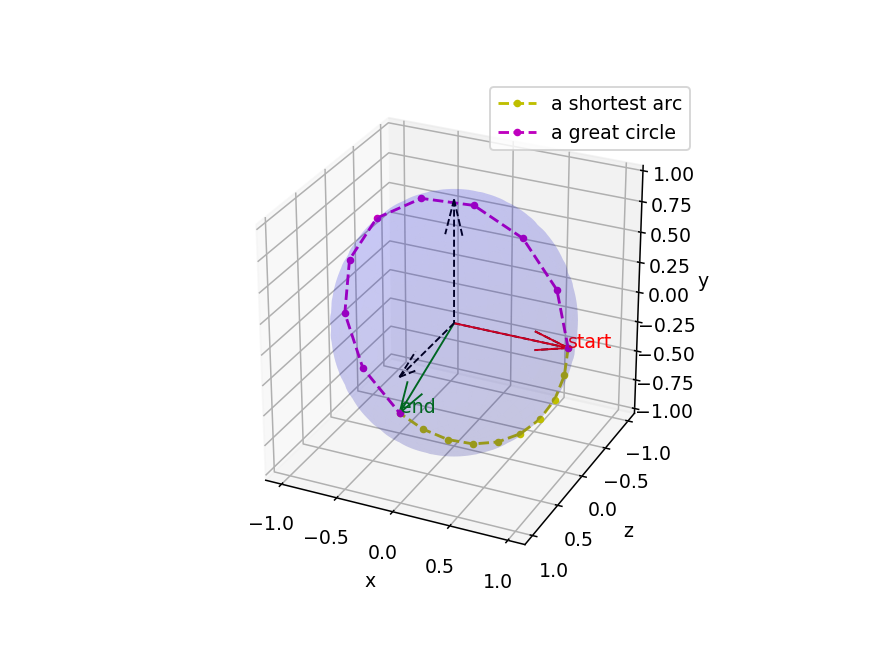

In [24]:
def plot3(axes):
    q1 = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(0.))
    q2 = Quaternion.from_axis_angle(np.array([0., 0., 1.]), math.radians(240.))
    v  = np.array([1., 0., 0.])

    path1 = []
    path2 = []
    for t in np.linspace(0., 1., 10):
        # interpolate along a shortest arc.
        q = Quaternion.slerp(q1, q2, t, allow_flip=True)
        path1.append(Quaternion.rotate(q, v))
        # interpolate along a great circle.
        q = Quaternion.slerp(q1, q2, t, allow_flip=False)
        path2.append(Quaternion.rotate(q, v))

    vs = path1[0]
    ve = path1[-1]

    path1 = np.array(path1).transpose()
    path2 = np.array(path2).transpose()
    #
    plot_sphere(axes, color='b', alpha=0.1)
    plot_basis(axes)
    plot_vector(axes, position=np.zeros(3), direction=np.take(vs, (0, 2, 1)), color='r')
    axes.text(vs[0], vs[2], vs[1], 'start', color='r')
    plot_vector(axes, position=np.zeros(3), direction=np.take(ve, (0, 2, 1)), color='g')
    axes.text(ve[0], ve[2], ve[1], 'end', color='g')
    axes.plot(path1[0], path1[2], path1[1], linestyle='dashed', marker='o', markersize=3, color='y', label='a shortest arc')
    axes.plot(path2[0], path2[2], path2[1], linestyle='dashed', marker='o', markersize=3, color='m', label='a great circle')
    axes.legend()

exec_plotter(plot3)